In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
%matplotlib widget
plt.style.use('dark_background')

In [2]:
A = SlabExact(ns=[1.], Ts=[15], xrefs=[1000], symmetric=True)

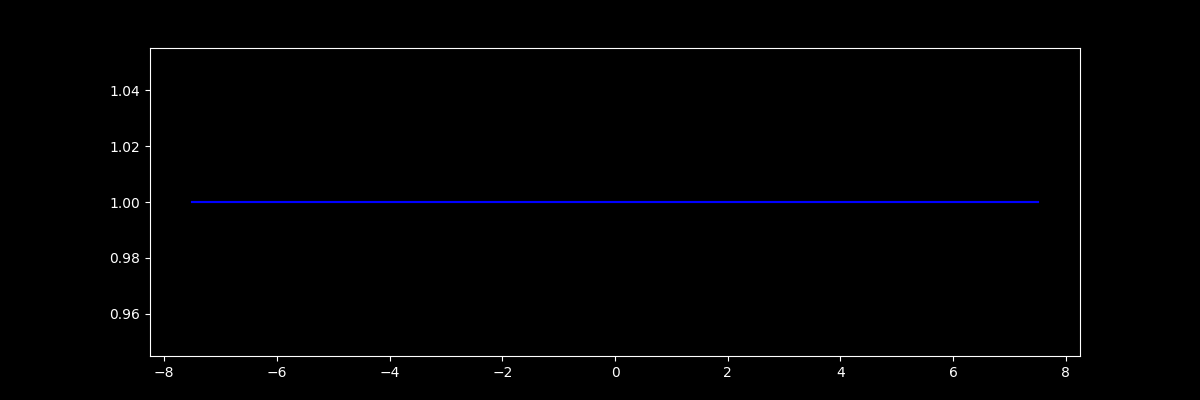

In [3]:
A.plot_refractive_index()

In [4]:
Propagator = A.propagator()

## Propagation for Delta function

In [21]:
s = 1
exact_args_p={'s':s, 'sign': 1}
exact_args_m={'s':s, 'sign': -1}

In [73]:
P_propagating_even = Propagator(A.real_contour(0, A.Z_evanescent, 75), exact_transform=A.delta_transform, exact_kwargs=exact_args_p)
P_evanescent_even = Propagator(A.real_contour(A.Z_evanescent, 100, 1000),  exact_transform=A.delta_transform, exact_kwargs=exact_args_p)

P_propagating_odd = Propagator(A.real_contour(0, A.Z_evanescent, 75), exact_transform=A.delta_transform, exact_kwargs=exact_args_m, sign=-1)
P_evanescent_odd = Propagator(A.real_contour(A.Z_evanescent, 100, 1000),  exact_transform=A.delta_transform, exact_kwargs=exact_args_m, sign=-1)

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

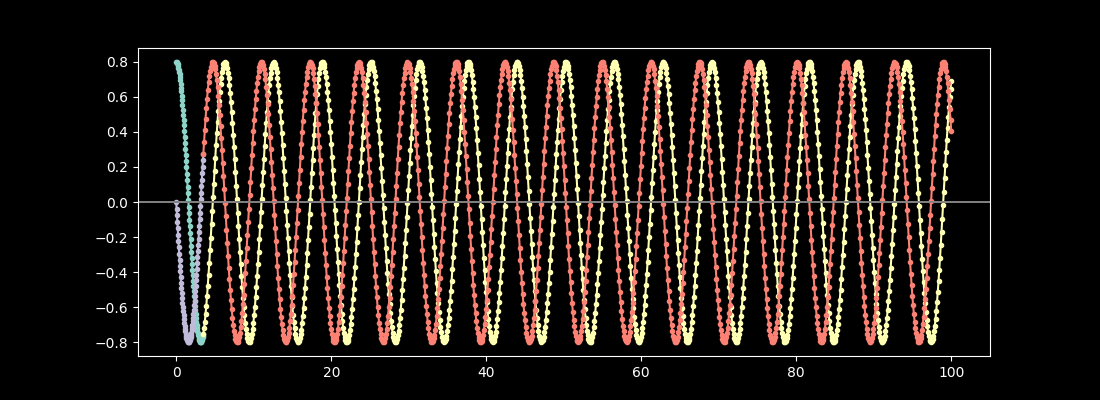

In [74]:
P_propagating_even.plot_transform()
P_evanescent_even.plot_transform(ax=plt.gca())

P_propagating_odd.plot_transform(ax=plt.gca())
P_evanescent_odd.plot_transform(ax=plt.gca())

In [75]:
prop = lambda x: P_propagating_even.slice_propagate(x) + P_propagating_odd.slice_propagate(x)
ev = lambda x: P_evanescent_even.slice_propagate(x) + P_evanescent_odd.slice_propagate(x)
full = lambda x: prop(x) + ev(x)

Prop = lambda x, z: P_propagating_even.propagate(x, z) + P_propagating_odd.propagate(x, z)
Ev = lambda x, z: P_evanescent_even.propagate(x, z) + P_evanescent_odd.propagate(x, z)
Full = lambda x, z : Prop(x,z) + Ev(x,z)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

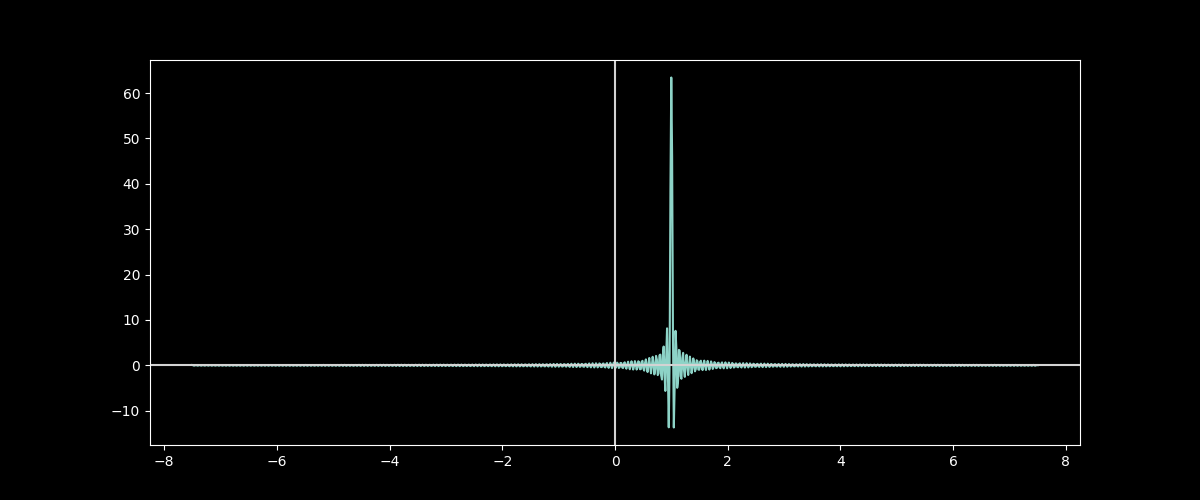

In [78]:
plt.close('all')
A.plot_field_1d(full)
# A.add_1d_plot(f0)
# A.add_1d_plot(ev, xs=xs)

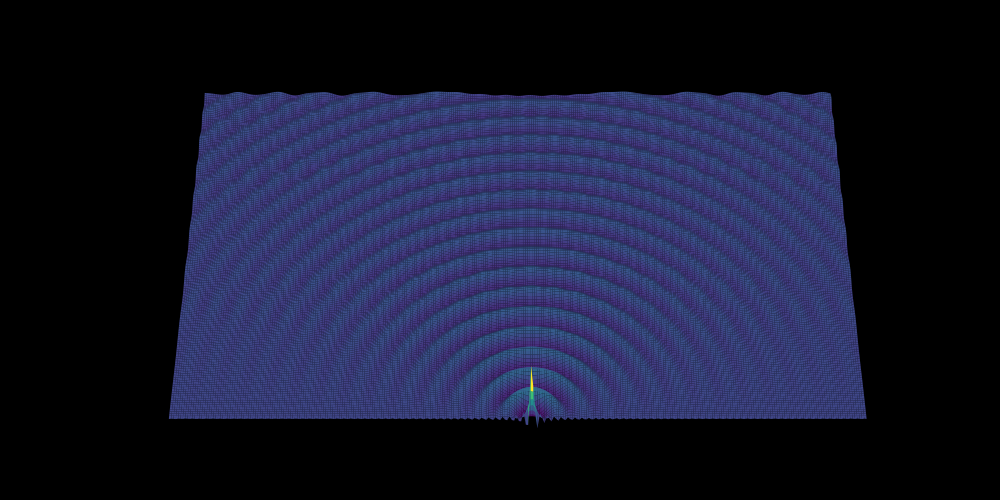

In [79]:
A.plot_field_2d_surface(Full, xs=np.linspace(-25, 25, 300), zmax=30, zref=200, cstride=1, rstride=1);